In [2]:
#Imports
from pathlib import Path
import pandas as pd
import hvplot.pandas
from sklearn.linear_model import LogisticRegression
from pandas.tseries.offsets import DateOffset
from sklearn.metrics import classification_report
from sklearn.svm import SVC
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report

In [3]:
df = pd.read_csv(Path('./bitcoin_data.csv'), index_col='date', parse_dates=True, infer_datetime_format=True)

display(df.head())

listing_close  twitter_buying  twitter_selling  \
date                                                         
2016-11-01         726.60            16.0              7.0   
2016-11-02         742.00             9.0              6.0   
2016-11-03         685.22            28.0              8.0   
2016-11-04         702.70            16.0              7.0   
2016-11-05         703.46            12.0              3.0   

            bitcointalk_buying  bitcointalk_selling  reddit_buying  \
date                                                                 
2016-11-01                62.0                 36.0           46.0   
2016-11-02                48.0                 35.0           46.0   
2016-11-03                69.0                 34.0           53.0   
2016-11-04                71.0                 38.0           27.0   
2016-11-05                51.0                 39.0           26.0   

            reddit_selling  twitter_positive  twitter_negative  \
date                                                             
2016-11-01            18.0              90.0              59.0   
2016-11-02            16.0              70.0              77.0   
2016-11-03            26.0              96.0             101.0   
2016-11-04            23.0              60.0              67.0   
2016-11-05            14.0              49.0              41.0   

            bitcointalk_positive  ...  reddit_pessimistic_doubtful  \
date                              ...                                
2016-11-01                 340.0  ...                         14.0   
2016-11-02                 330.0  ...                         17.0   
2016-11-03                 293.0  ...                         11.0   
2016-11-04                 227.0  ...                          9.0   
2016-11-05                 252.0  ...                          7.0   

            twitter_bullish  twitter_happy  twitter_optimistic  \
date                                                             
2016-11-01             42.0           11.0                29.0   
2016-11-02             16.0            2.0                24.0   
2016-11-03             31.0            4.0                36.0   
2016-11-04             10.0            4.0                18.0   
2016-11-05             17.0            0.0                20.0   

            bitcointalk_bullish  bitcointalk_optimistic  bitcointalk_happy  \
date                                                                         
2016-11-01                 34.0                   152.0               40.0   
2016-11-02                 32.0                   195.0               29.0   
2016-11-03                 36.0                   147.0               23.0   
2016-11-04                 23.0                   123.0               12.0   
2016-11-05                 24.0                   130.0               19.0   

            reddit_happy  reddit_optimistic  reddit_bullish  
date                                                         
2016-11-01          15.0               49.0            20.0  
2016-11-02          15.0               52.0            16.0  
2016-11-03          17.0               44.0            22.0  
2016-11-04          11.0               25.0            23.0  
2016-11-05           7.0               25.0             8.0  

[5 rows x 31 columns]

In [4]:
df.groupby(by='date').sum().head()

listing_close  twitter_buying  twitter_selling  \
date                                                         
2016-11-01         726.60            16.0              7.0   
2016-11-02         742.00             9.0              6.0   
2016-11-03         685.22            28.0              8.0   
2016-11-04         702.70            16.0              7.0   
2016-11-05         703.46            12.0              3.0   

            bitcointalk_buying  bitcointalk_selling  reddit_buying  \
date                                                                 
2016-11-01                62.0                 36.0           46.0   
2016-11-02                48.0                 35.0           46.0   
2016-11-03                69.0                 34.0           53.0   
2016-11-04                71.0                 38.0           27.0   
2016-11-05                51.0                 39.0           26.0   

            reddit_selling  twitter_positive  twitter_negative  \
date                                                             
2016-11-01            18.0              90.0              59.0   
2016-11-02            16.0              70.0              77.0   
2016-11-03            26.0              96.0             101.0   
2016-11-04            23.0              60.0              67.0   
2016-11-05            14.0              49.0              41.0   

            bitcointalk_positive  ...  reddit_pessimistic_doubtful  \
date                              ...                                
2016-11-01                 340.0  ...                         14.0   
2016-11-02                 330.0  ...                         17.0   
2016-11-03                 293.0  ...                         11.0   
2016-11-04                 227.0  ...                          9.0   
2016-11-05                 252.0  ...                          7.0   

            twitter_bullish  twitter_happy  twitter_optimistic  \
date                                                             
2016-11-01             42.0           11.0                29.0   
2016-11-02             16.0            2.0                24.0   
2016-11-03             31.0            4.0                36.0   
2016-11-04             10.0            4.0                18.0   
2016-11-05             17.0            0.0                20.0   

            bitcointalk_bullish  bitcointalk_optimistic  bitcointalk_happy  \
date                                                                         
2016-11-01                 34.0                   152.0               40.0   
2016-11-02                 32.0                   195.0               29.0   
2016-11-03                 36.0                   147.0               23.0   
2016-11-04                 23.0                   123.0               12.0   
2016-11-05                 24.0                   130.0               19.0   

            reddit_happy  reddit_optimistic  reddit_bullish  
date                                                         
2016-11-01          15.0               49.0            20.0  
2016-11-02          15.0               52.0            16.0  
2016-11-03          17.0               44.0            22.0  
2016-11-04          11.0               25.0            23.0  
2016-11-05           7.0               25.0             8.0  

[5 rows x 31 columns]

In [5]:
df.describe()

listing_close  twitter_buying  twitter_selling  bitcointalk_buying  \
count    1996.000000     1996.000000      1996.000000         1996.000000   
mean    16452.290792       81.660822        46.728457           89.191383   
std     17534.248085       49.602628        31.743417           80.405516   
min       685.220000        0.000000         0.000000           13.000000   
25%      5199.972500       49.000000        26.000000           39.000000   
50%      8769.050000       74.000000        40.000000           56.500000   
75%     19162.210000      105.000000        60.000000          104.250000   
max     67559.000000      485.000000       323.000000          572.000000   

       bitcointalk_selling  reddit_buying  reddit_selling  twitter_positive  \
count          1996.000000    1996.000000     1996.000000       1996.000000   
mean             54.690882     187.526052       95.225952        313.394289   
std              48.262691     198.709324      100.528995        153.417560   
min               4.000000      12.000000        6.000000          0.000000   
25%              24.000000      78.000000       39.000000        210.000000   
50%              36.000000     125.000000       65.000000        288.000000   
75%              68.000000     208.000000      107.000000        402.000000   
max             415.000000    2016.000000     1077.000000       1085.000000   

       twitter_negative  bitcointalk_positive  ...  \
count       1996.000000           1996.000000  ...   
mean         351.041583            477.361723  ...   
std          174.454250            415.407861  ...   
min            0.000000             98.000000  ...   
25%          230.000000            198.000000  ...   
50%          329.000000            301.000000  ...   
75%          454.000000            552.000000  ...   
max         1163.000000           1949.000000  ...   

       reddit_pessimistic_doubtful  twitter_bullish  twitter_happy  \
count                  1996.000000      1996.000000    1996.000000   
mean                     60.406313       148.148297      16.950401   
std                      42.262656        79.713089      16.126413   
min                       4.000000         0.000000       0.000000   
25%                      35.000000        95.750000       9.000000   
50%                      50.000000       140.000000      14.000000   
75%                      71.000000       195.000000      20.000000   
max                     411.000000       523.000000     268.000000   

       twitter_optimistic  bitcointalk_bullish  bitcointalk_optimistic  \
count         1996.000000          1996.000000             1996.000000   
mean            75.557615            76.947896              293.572144   
std             38.744134            55.560478              278.853319   
min              0.000000            14.000000               52.000000   
25%             48.000000            38.000000              108.750000   
50%             67.000000            57.000000              172.000000   
75%             96.000000            97.000000              335.500000   
max            281.000000           366.000000             1185.000000   

       bitcointalk_happy  reddit_happy  reddit_optimistic  reddit_bullish  
count        1996.000000   1996.000000        1996.000000     1996.000000  
mean           25.385271     46.110220         184.779559       99.761523  
std            20.695728     41.739362         139.837387       95.361579  
min             1.000000      4.000000          19.000000        4.000000  
25%            11.000000     22.000000         100.000000       41.000000  
50%            18.000000     33.000000         150.000000       67.000000  
75%            32.000000     50.000000         211.000000      128.000000  
max           134.000000    359.000000        1180.000000      912.000000  

[8 rows x 31 columns]

In [6]:
df_daily = df.resample('D').sum()

In [7]:
daily_close_df = df['listing_close'].resample('D').last()

In [8]:
df_daily['listing_close']=daily_close_df
df_daily.head()

listing_close  twitter_buying  twitter_selling  \
date                                                         
2016-11-01         726.60            16.0              7.0   
2016-11-02         742.00             9.0              6.0   
2016-11-03         685.22            28.0              8.0   
2016-11-04         702.70            16.0              7.0   
2016-11-05         703.46            12.0              3.0   

            bitcointalk_buying  bitcointalk_selling  reddit_buying  \
date                                                                 
2016-11-01                62.0                 36.0           46.0   
2016-11-02                48.0                 35.0           46.0   
2016-11-03                69.0                 34.0           53.0   
2016-11-04                71.0                 38.0           27.0   
2016-11-05                51.0                 39.0           26.0   

            reddit_selling  twitter_positive  twitter_negative  \
date                                                             
2016-11-01            18.0              90.0              59.0   
2016-11-02            16.0              70.0              77.0   
2016-11-03            26.0              96.0             101.0   
2016-11-04            23.0              60.0              67.0   
2016-11-05            14.0              49.0              41.0   

            bitcointalk_positive  ...  reddit_pessimistic_doubtful  \
date                              ...                                
2016-11-01                 340.0  ...                         14.0   
2016-11-02                 330.0  ...                         17.0   
2016-11-03                 293.0  ...                         11.0   
2016-11-04                 227.0  ...                          9.0   
2016-11-05                 252.0  ...                          7.0   

            twitter_bullish  twitter_happy  twitter_optimistic  \
date                                                             
2016-11-01             42.0           11.0                29.0   
2016-11-02             16.0            2.0                24.0   
2016-11-03             31.0            4.0                36.0   
2016-11-04             10.0            4.0                18.0   
2016-11-05             17.0            0.0                20.0   

            bitcointalk_bullish  bitcointalk_optimistic  bitcointalk_happy  \
date                                                                         
2016-11-01                 34.0                   152.0               40.0   
2016-11-02                 32.0                   195.0               29.0   
2016-11-03                 36.0                   147.0               23.0   
2016-11-04                 23.0                   123.0               12.0   
2016-11-05                 24.0                   130.0               19.0   

            reddit_happy  reddit_optimistic  reddit_bullish  
date                                                         
2016-11-01          15.0               49.0            20.0  
2016-11-02          15.0               52.0            16.0  
2016-11-03          17.0               44.0            22.0  
2016-11-04          11.0               25.0            23.0  
2016-11-05           7.0               25.0             8.0  

[5 rows x 31 columns]

<AxesSubplot:xlabel='date'>

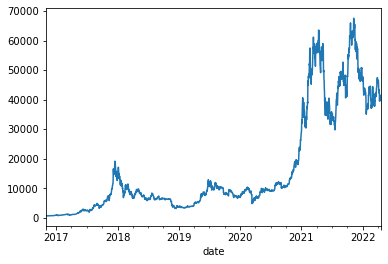

In [9]:
df_daily['listing_close'].plot()

In [10]:
negative_sentiment=['twitter_hacks',
                    'twitter_pessimistic_doubtful',
                    'twitter_selling',
                    'twitter_market_manipulation',
                    'twitter_angry', 
                    'twitter_fearful_concerned',
                    'bitcointalk_angry',
                    'bitcointalk_hacks',
                    'bitcointalk_pessimistic_doubtful',
                    'bitcointalk_selling',
                    'bitcointalk_market_manipulation',
                    'bitcointalk_fearful_concerned',
                   'reddit_selling','reddit_angry','reddit_hacks','reddit_pessimistic_doubtful','reddit_fearful_concerned']

df_sentiment = pd.DataFrame(data=None, columns = (['date','test']))

for trigger in negative_sentiment:
    if df_daily==negative_sentiment[trigger]:
                            df_sentiment['date']=df_daily['date']
                            df_sentiment['test']=-1
        

TypeError: list indices must be integers or slices, not str

In [11]:
columns_list=df_daily.columns
columns_list

Index(['listing_close', 'twitter_buying', 'twitter_selling',
       'bitcointalk_buying', 'bitcointalk_selling', 'reddit_buying',
       'reddit_selling', 'twitter_positive', 'twitter_negative',
       'bitcointalk_positive', 'bitcointalk_negative', 'reddit_positive',
       'reddit_negative', 'twitter_bearish', 'bitcointalk_bearish',
       'reddit_bearish', 'twitter_angry', 'bitcointalk_angry', 'reddit_angry',
       'twitter_pessimistic_doubtful', 'bitcointalk_pessimistic_doubtful',
       'reddit_pessimistic_doubtful', 'twitter_bullish', 'twitter_happy',
       'twitter_optimistic', 'bitcointalk_bullish', 'bitcointalk_optimistic',
       'bitcointalk_happy', 'reddit_happy', 'reddit_optimistic',
       'reddit_bullish'],
      dtype='object')

In [12]:
#DataFrame with selected features
df_clean = df_daily[['listing_close','twitter_buying','twitter_selling','bitcointalk_buying','bitcointalk_selling','reddit_buying','reddit_selling','twitter_positive','twitter_negative','bitcointalk_positive','bitcointalk_negative','reddit_positive','reddit_negative','twitter_bearish','bitcointalk_bearish','reddit_bearish','twitter_angry','bitcointalk_angry','reddit_angry','twitter_pessimistic_doubtful','bitcointalk_pessimistic_doubtful','reddit_pessimistic_doubtful','twitter_bullish','twitter_happy','twitter_optimistic','bitcointalk_bullish','bitcointalk_optimistic','bitcointalk_happy','reddit_happy','reddit_optimistic','reddit_bullish']]
df_clean

listing_close  twitter_buying  twitter_selling  \
date                                                         
2016-11-01         726.60            16.0              7.0   
2016-11-02         742.00             9.0              6.0   
2016-11-03         685.22            28.0              8.0   
2016-11-04         702.70            16.0              7.0   
2016-11-05         703.46            12.0              3.0   
...                   ...             ...              ...   
2022-04-15       40563.18            41.0             29.0   
2022-04-16       40395.67            17.0             19.0   
2022-04-17       39691.27            20.0             23.0   
2022-04-18       40814.60            45.0             30.0   
2022-04-19       41444.08            21.0             25.0   

            bitcointalk_buying  bitcointalk_selling  reddit_buying  \
date                                                                 
2016-11-01                62.0                 36.0           46.0   
2016-11-02                48.0                 35.0           46.0   
2016-11-03                69.0                 34.0           53.0   
2016-11-04                71.0                 38.0           27.0   
2016-11-05                51.0                 39.0           26.0   
...                        ...                  ...            ...   
2022-04-15                32.0                 19.0          162.0   
2022-04-16                23.0                 18.0          167.0   
2022-04-17                23.0                 11.0          147.0   
2022-04-18                25.0                  9.0          227.0   
2022-04-19                17.0                  7.0          124.0   

            reddit_selling  twitter_positive  twitter_negative  \
date                                                             
2016-11-01            18.0              90.0              59.0   
2016-11-02            16.0              70.0              77.0   
2016-11-03            26.0              96.0             101.0   
2016-11-04            23.0              60.0              67.0   
2016-11-05            14.0              49.0              41.0   
...                    ...               ...               ...   
2022-04-15            62.0             144.0             156.0   
2022-04-16            75.0              96.0             108.0   
2022-04-17            69.0             122.0             100.0   
2022-04-18            88.0             184.0             182.0   
2022-04-19            56.0             187.0             109.0   

            bitcointalk_positive  ...  reddit_pessimistic_doubtful  \
date                              ...                                
2016-11-01                 340.0  ...                         14.0   
2016-11-02                 330.0  ...                         17.0   
2016-11-03                 293.0  ...                         11.0   
2016-11-04                 227.0  ...                          9.0   
2016-11-05                 252.0  ...                          7.0   
...                          ...  ...                          ...   
2022-04-15                 136.0  ...                         64.0   
2022-04-16                 135.0  ...                         81.0   
2022-04-17                 118.0  ...                         62.0   
2022-04-18                 105.0  ...                        102.0   
2022-04-19                  98.0  ...                         76.0   

            twitter_bullish  twitter_happy  twitter_optimistic  \
date                                                             
2016-11-01             42.0           11.0                29.0   
2016-11-02             16.0            2.0                24.0   
2016-11-03             31.0            4.0                36.0   
2016-11-04             10.0            4.0                18.0   
2016-11-05             17.0            0.0                20.0   
...                     ...            ...                 ...

In [13]:
df_clean.to_csv('bitcoin_data.csv')

In [14]:
df_clean['positive_sum']=df_clean['twitter_buying']+df_clean['bitcointalk_buying']+df_clean['reddit_buying']+df_clean['twitter_positive']+df_clean['bitcointalk_positive']+df_clean['reddit_positive']+df_clean['twitter_bullish']+df_clean['twitter_optimistic']+df_clean['twitter_happy']+df_clean['bitcointalk_bullish']+df_clean['bitcointalk_optimistic']+df_clean['bitcointalk_happy']+df_clean['reddit_bullish']+df_clean['reddit_optimistic']+df_clean['reddit_happy']
df_clean

listing_close  twitter_buying  twitter_selling  \
date                                                         
2016-11-01         726.60            16.0              7.0   
2016-11-02         742.00             9.0              6.0   
2016-11-03         685.22            28.0              8.0   
2016-11-04         702.70            16.0              7.0   
2016-11-05         703.46            12.0              3.0   
...                   ...             ...              ...   
2022-04-15       40563.18            41.0             29.0   
2022-04-16       40395.67            17.0             19.0   
2022-04-17       39691.27            20.0             23.0   
2022-04-18       40814.60            45.0             30.0   
2022-04-19       41444.08            21.0             25.0   

            bitcointalk_buying  bitcointalk_selling  reddit_buying  \
date                                                                 
2016-11-01                62.0                 36.0           46.0   
2016-11-02                48.0                 35.0           46.0   
2016-11-03                69.0                 34.0           53.0   
2016-11-04                71.0                 38.0           27.0   
2016-11-05                51.0                 39.0           26.0   
...                        ...                  ...            ...   
2022-04-15                32.0                 19.0          162.0   
2022-04-16                23.0                 18.0          167.0   
2022-04-17                23.0                 11.0          147.0   
2022-04-18                25.0                  9.0          227.0   
2022-04-19                17.0                  7.0          124.0   

            reddit_selling  twitter_positive  twitter_negative  \
date                                                             
2016-11-01            18.0              90.0              59.0   
2016-11-02            16.0              70.0              77.0   
2016-11-03            26.0              96.0             101.0   
2016-11-04            23.0              60.0              67.0   
2016-11-05            14.0              49.0              41.0   
...                    ...               ...               ...   
2022-04-15            62.0             144.0             156.0   
2022-04-16            75.0              96.0             108.0   
2022-04-17            69.0             122.0             100.0   
2022-04-18            88.0             184.0             182.0   
2022-04-19            56.0             187.0             109.0   

            bitcointalk_positive  ...  twitter_bullish  twitter_happy  \
date                              ...                                   
2016-11-01                 340.0  ...             42.0           11.0   
2016-11-02                 330.0  ...             16.0            2.0   
2016-11-03                 293.0  ...             31.0            4.0   
2016-11-04                 227.0  ...             10.0            4.0   
2016-11-05                 252.0  ...             17.0            0.0   
...                          ...  ...              ...            ...   
2022-04-15                 136.0  ...             77.0            7.0   
2022-04-16                 135.0  ...             50.0            5.0   
2022-04-17                 118.0  ...             75.0           14.0   
2022-04-18                 105.0  ...            108.0            6.0   
2022-04-19                  98.0  ...            109.0            5.0   

            twitter_optimistic  bitcointalk_bullish  bitcointalk_optimistic  \
date                                                                          
2016-11-01                29.0                 34.0                   152.0   
2016-11-02                24.0                 32.0                   195.0   
2016-11-03                36.0                 36.0                   147.0   
2016-11-04                18.0                 23.0                   123.0   
2016-11-05 

In [15]:
df_clean['negative_sum'] = df_clean['twitter_selling']+df_clean['bitcointalk_selling']+df_clean['reddit_selling'] + df_clean['twitter_negative']+df_clean['bitcointalk_negative']+df_clean['reddit_negative']+df_clean['twitter_pessimistic_doubtful']+df_clean['twitter_angry']+df_clean['twitter_bearish']+df_clean['bitcointalk_pessimistic_doubtful']+df_clean['bitcointalk_angry']+df_clean['bitcointalk_bearish']+df_clean['reddit_pessimistic_doubtful']+df_clean['reddit_angry']+df_clean['reddit_bearish']

In [16]:
df_clean['net']=df_clean['positive_sum']-df_clean['negative_sum']
df_clean

listing_close  twitter_buying  twitter_selling  \
date                                                         
2016-11-01         726.60            16.0              7.0   
2016-11-02         742.00             9.0              6.0   
2016-11-03         685.22            28.0              8.0   
2016-11-04         702.70            16.0              7.0   
2016-11-05         703.46            12.0              3.0   
...                   ...             ...              ...   
2022-04-15       40563.18            41.0             29.0   
2022-04-16       40395.67            17.0             19.0   
2022-04-17       39691.27            20.0             23.0   
2022-04-18       40814.60            45.0             30.0   
2022-04-19       41444.08            21.0             25.0   

            bitcointalk_buying  bitcointalk_selling  reddit_buying  \
date                                                                 
2016-11-01                62.0                 36.0           46.0   
2016-11-02                48.0                 35.0           46.0   
2016-11-03                69.0                 34.0           53.0   
2016-11-04                71.0                 38.0           27.0   
2016-11-05                51.0                 39.0           26.0   
...                        ...                  ...            ...   
2022-04-15                32.0                 19.0          162.0   
2022-04-16                23.0                 18.0          167.0   
2022-04-17                23.0                 11.0          147.0   
2022-04-18                25.0                  9.0          227.0   
2022-04-19                17.0                  7.0          124.0   

            reddit_selling  twitter_positive  twitter_negative  \
date                                                             
2016-11-01            18.0              90.0              59.0   
2016-11-02            16.0              70.0              77.0   
2016-11-03            26.0              96.0             101.0   
2016-11-04            23.0              60.0              67.0   
2016-11-05            14.0              49.0              41.0   
...                    ...               ...               ...   
2022-04-15            62.0             144.0             156.0   
2022-04-16            75.0              96.0             108.0   
2022-04-17            69.0             122.0             100.0   
2022-04-18            88.0             184.0             182.0   
2022-04-19            56.0             187.0             109.0   

            bitcointalk_positive  ...  twitter_optimistic  \
date                              ...                       
2016-11-01                 340.0  ...                29.0   
2016-11-02                 330.0  ...                24.0   
2016-11-03                 293.0  ...                36.0   
2016-11-04                 227.0  ...                18.0   
2016-11-05                 252.0  ...                20.0   
...                          ...  ...                 ...   
2022-04-15                 136.0  ...                42.0   
2022-04-16                 135.0  ...                26.0   
2022-04-17                 118.0  ...                17.0   
2022-04-18                 105.0  ...                28.0   
2022-04-19                  98.0  ...                26.0   

            bitcointalk_bullish  bitcointalk_optimistic  bitcointalk_happy  \
date                                                                         
2016-11-01                 34.0                   152.0               40.0   
2016-11-02                 32.0                   195.0               29.0   
2016-11-03                 36.0                   147.0               23.0   
2016-11-04                 23.0                   123.0               12.0   
2016-11-05                 24.0                   130.0               19.0   
...                         ...                     ...                ...   
2022-04-15       

In [17]:
df_clean['net'].hvplot(figsize=(15,7))

:Curve   [date]   (net)

In [18]:
df_clean['listing_close'].hvplot(figsize=(15,7))

:Curve   [date]   (listing_close)

In [19]:
df_clean[['listing_close','net']].corr()

listing_close       net
listing_close       1.000000 -0.092836
net                -0.092836  1.000000

In [20]:
df_clean['net'].describe()

count    1996.000000
mean       -9.031563
std       349.449752
min     -3497.000000
25%      -174.000000
50%       -29.000000
75%       140.500000
max      1900.000000
Name: net, dtype: float64

In [21]:
count(df_clean.net>=750 | df_clean.net<=-750)

NameError: name 'count' is not defined

In [22]:
count = 0

for row in df_clean['net']:
    if row>=750:
        count=count+1
        df_clean['signal']=1
        
    elif row<=-750:
        count=count+1
        df_clean['signal']=-1
        
    else:
        df_clean['signal']=None
        
count
df_clean

listing_close  twitter_buying  twitter_selling  \
date                                                         
2016-11-01         726.60            16.0              7.0   
2016-11-02         742.00             9.0              6.0   
2016-11-03         685.22            28.0              8.0   
2016-11-04         702.70            16.0              7.0   
2016-11-05         703.46            12.0              3.0   
...                   ...             ...              ...   
2022-04-15       40563.18            41.0             29.0   
2022-04-16       40395.67            17.0             19.0   
2022-04-17       39691.27            20.0             23.0   
2022-04-18       40814.60            45.0             30.0   
2022-04-19       41444.08            21.0             25.0   

            bitcointalk_buying  bitcointalk_selling  reddit_buying  \
date                                                                 
2016-11-01                62.0                 36.0           46.0   
2016-11-02                48.0                 35.0           46.0   
2016-11-03                69.0                 34.0           53.0   
2016-11-04                71.0                 38.0           27.0   
2016-11-05                51.0                 39.0           26.0   
...                        ...                  ...            ...   
2022-04-15                32.0                 19.0          162.0   
2022-04-16                23.0                 18.0          167.0   
2022-04-17                23.0                 11.0          147.0   
2022-04-18                25.0                  9.0          227.0   
2022-04-19                17.0                  7.0          124.0   

            reddit_selling  twitter_positive  twitter_negative  \
date                                                             
2016-11-01            18.0              90.0              59.0   
2016-11-02            16.0              70.0              77.0   
2016-11-03            26.0              96.0             101.0   
2016-11-04            23.0              60.0              67.0   
2016-11-05            14.0              49.0              41.0   
...                    ...               ...               ...   
2022-04-15            62.0             144.0             156.0   
2022-04-16            75.0              96.0             108.0   
2022-04-17            69.0             122.0             100.0   
2022-04-18            88.0             184.0             182.0   
2022-04-19            56.0             187.0             109.0   

            bitcointalk_positive  ...  bitcointalk_bullish  \
date                              ...                        
2016-11-01                 340.0  ...                 34.0   
2016-11-02                 330.0  ...                 32.0   
2016-11-03                 293.0  ...                 36.0   
2016-11-04                 227.0  ...                 23.0   
2016-11-05                 252.0  ...                 24.0   
...                          ...  ...                  ...   
2022-04-15                 136.0  ...                 25.0   
2022-04-16                 135.0  ...                 24.0   
2022-04-17                 118.0  ...                 20.0   
2022-04-18                 105.0  ...                 21.0   
2022-04-19                  98.0  ...                 26.0   

            bitcointalk_optimistic  bitcointalk_happy  reddit_happy  \
date                                                                  
2016-11-01                   152.0               40.0          15.0   
2016-11-02                   195.0               29.0          15.0   
2016-11-03                   147.0               23.0          17.0   
2016-11-04                   123.0               12.0          11.0   
2016-11-05                   130.0               19.0           7.0   
...                            ...                ...           ...   
2022-04-15                    73.0                4.0       

In [23]:
df_clean['signal'].describe()

count       0
unique      0
top       NaN
freq      NaN
Name: signal, dtype: object

In [24]:
df_clean['signal'] = 0.0
df_clean.loc[df_clean['net'] > 750, 'signal'] = 1
df_clean.loc[df_clean['net'] < -750, 'signal'] = -1
df_clean.head()


listing_close  twitter_buying  twitter_selling  \
date                                                         
2016-11-01         726.60            16.0              7.0   
2016-11-02         742.00             9.0              6.0   
2016-11-03         685.22            28.0              8.0   
2016-11-04         702.70            16.0              7.0   
2016-11-05         703.46            12.0              3.0   

            bitcointalk_buying  bitcointalk_selling  reddit_buying  \
date                                                                 
2016-11-01                62.0                 36.0           46.0   
2016-11-02                48.0                 35.0           46.0   
2016-11-03                69.0                 34.0           53.0   
2016-11-04                71.0                 38.0           27.0   
2016-11-05                51.0                 39.0           26.0   

            reddit_selling  twitter_positive  twitter_negative  \
date                                                             
2016-11-01            18.0              90.0              59.0   
2016-11-02            16.0              70.0              77.0   
2016-11-03            26.0              96.0             101.0   
2016-11-04            23.0              60.0              67.0   
2016-11-05            14.0              49.0              41.0   

            bitcointalk_positive  ...  bitcointalk_bullish  \
date                              ...                        
2016-11-01                 340.0  ...                 34.0   
2016-11-02                 330.0  ...                 32.0   
2016-11-03                 293.0  ...                 36.0   
2016-11-04                 227.0  ...                 23.0   
2016-11-05                 252.0  ...                 24.0   

            bitcointalk_optimistic  bitcointalk_happy  reddit_happy  \
date                                                                  
2016-11-01                   152.0               40.0          15.0   
2016-11-02                   195.0               29.0          15.0   
2016-11-03                   147.0               23.0          17.0   
2016-11-04                   123.0               12.0          11.0   
2016-11-05                   130.0               19.0           7.0   

            reddit_optimistic  reddit_bullish  positive_sum  negative_sum  \
date                                                                        
2016-11-01               49.0            20.0        1085.0         943.0   
2016-11-02               52.0            16.0        1016.0        1011.0   
2016-11-03               44.0            22.0        1014.0        1023.0   
2016-11-04               25.0            23.0         732.0         905.0   
2016-11-05               25.0             8.0         712.0         777.0   

              net  signal  
date                       
2016-11-01  142.0     0.0  
2016-11-02    5.0     0.0  
2016-11-03   -9.0     0.0  
2016-11-04 -173.0     0.0  
2016-11-05  -65.0     0.0  

[5 rows x 35 columns]

In [25]:
df_clean['signal'].value_counts()

 0.0    1919
 1.0      45
-1.0      32
Name: signal, dtype: int64

In [26]:
#signal
df_clean['returns'] = df_clean['listing_close'].pct_change()
df_clean['returns'] = df_clean['returns'].shift(-1)
df_clean['ml_signal'] = 0.0
df_clean.loc[df_clean['returns'] >= 0, 'ml_signal'] = 1
df_clean.loc[df_clean['returns'] < 0, 'ml_signal'] = -1
df_clean['up_next_day']=df_clean['ml_signal'].shift(periods=-1)
df_clean.dropna(inplace=True)

In [27]:
model = LogisticRegression()

In [28]:
X = df_clean.iloc[:, 1:34]
y = df_clean['up_next_day']

training_begin = X.index.min()
training_end = training_begin + DateOffset(months = 40)

X_train = X[training_begin:training_end]
X_test = X[training_end+DateOffset(days = 1):]
y_train = y[training_begin:training_end]
y_test = y[training_end+DateOffset(days = 1):]

In [29]:
#LogisticRegression Model
model.fit(X_train, y_train)
pred = model.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

        -1.0       0.42      0.08      0.14       357
         0.0       0.00      0.00      0.00         1
         1.0       0.54      0.90      0.67       420

    accuracy                           0.53       778
   macro avg       0.32      0.33      0.27       778
weighted avg       0.48      0.53      0.43       778



C:\Users\office2\anaconda3\envs\dev\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\office2\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\office2\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and

In [30]:
X2 = df_clean.iloc[:, 1:35]
y2 = df_clean['ml_signal']

from pandas.tseries.offsets import DateOffset

training_begin = X2.index.min()
training_end = training_begin + DateOffset(months = 24)

X2_train = X[training_begin:training_end]
X2_test = X[training_end+DateOffset(days = 1):]
y2_train = y[training_begin:training_end]
y2_test = y[training_end+DateOffset(days = 1):]

In [31]:
model.fit(X2_train, y2_train)
pred = model.predict(X2_test)


print(classification_report(y2_test, pred))

              precision    recall  f1-score   support

        -1.0       0.48      0.22      0.31       594
         0.0       0.00      0.00      0.00         1
         1.0       0.53      0.79      0.63       669

    accuracy                           0.52      1264
   macro avg       0.34      0.34      0.31      1264
weighted avg       0.51      0.52      0.48      1264



C:\Users\office2\anaconda3\envs\dev\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\office2\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\office2\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and

In [32]:
#Reddit DataFrame
new_df = df_clean.loc[:,~df_clean.columns.str.startswith("twitter")]
reddit_df = new_df.loc[:,~new_df.columns.str.startswith("bitcoin")]
reddit_df


listing_close  reddit_buying  reddit_selling  reddit_positive  \
date                                                                        
2016-11-01         726.60           46.0            18.0            139.0   
2016-11-02         742.00           46.0            16.0            132.0   
2016-11-03         685.22           53.0            26.0            115.0   
2016-11-04         702.70           27.0            23.0             82.0   
2016-11-05         703.46           26.0            14.0             72.0   
...                   ...            ...             ...              ...   
2022-04-14       39961.53          169.0            85.0            451.0   
2022-04-15       40563.18          162.0            62.0            426.0   
2022-04-16       40395.67          167.0            75.0            454.0   
2022-04-17       39691.27          147.0            69.0            461.0   
2022-04-18       40814.60          227.0            88.0            626.0   

            reddit_negative  reddit_bearish  reddit_angry  \
date                                                        
2016-11-01            237.0             8.0           6.0   
2016-11-02            231.0             9.0           6.0   
2016-11-03            242.0            10.0          10.0   
2016-11-04            176.0            11.0          11.0   
2016-11-05            146.0             8.0           5.0   
...                     ...             ...           ...   
2022-04-14            896.0            54.0          38.0   
2022-04-15            838.0            61.0          30.0   
2022-04-16            870.0            48.0          36.0   
2022-04-17            867.0            50.0          36.0   
2022-04-18           1307.0            86.0          49.0   

            reddit_pessimistic_doubtful  reddit_happy  reddit_optimistic  \
date                                                                       
2016-11-01                         14.0          15.0               49.0   
2016-11-02                         17.0          15.0               52.0   
2016-11-03                         11.0          17.0               44.0   
2016-11-04                          9.0          11.0               25.0   
2016-11-05                          7.0           7.0               25.0   
...                                 ...           ...                ...   
2022-04-14                         94.0          36.0              180.0   
2022-04-15                         64.0          41.0              170.0   
2022-04-16                         81.0          23.0              143.0   
2022-04-17                         62.0          27.0              197.0   
2022-04-18                        102.0          46.0              249.0   

            reddit_bullish  positive_sum  negative_sum    net  signal  \
date                                                                    
2016-11-01            20.0        1085.0         943.0  142.0     0.0   
2016-11-02            16.0        1016.0        1011.0    5.0     0.0   
2016-11-03            22.0        1014.0        1023.0   -9.0     0.0   
2016-11-04            23.0         732.0         905.0 -173.0     0.0   
2016-11-05             8.0         712.0         777.0  -65.0     0.0   
...                    ...           ...           ...    ...     ...   
2022-04-14            82.0        1546.0        1772.0 -226.0     0.0   
2022-04-15            81.0        1461.0        1610.0 -149.0     0.0   
2022-04-16            69.0        1317.0        1558.0 -241.0     0.0   
2022-04-17            79.0        1400.0        1526.0 -126.0     0.0   
2022-04-18            92.0        1834.0        2186.0 -352.0     0.0   

             returns  ml_signal  up_next_day  
date                                          
2016-11-01  0.021195        1.0         -1.0  
2016-11-02 -0.076523       -1.0          1.0  
2016-11-03  0.025510        1.0          1.0  
2016-11-04  0.001082        1.0          1

In [33]:
#BitcoinTalk DataFrame
new_df = df_clean.loc[:,~df_clean.columns.str.startswith("twitter")]
bitcoin_talk_df = new_df.loc[:,~new_df.columns.str.startswith("reddit")]
bitcoin_talk_df

listing_close  bitcointalk_buying  bitcointalk_selling  \
date                                                                 
2016-11-01         726.60                62.0                 36.0   
2016-11-02         742.00                48.0                 35.0   
2016-11-03         685.22                69.0                 34.0   
2016-11-04         702.70                71.0                 38.0   
2016-11-05         703.46                51.0                 39.0   
...                   ...                 ...                  ...   
2022-04-14       39961.53                30.0                 18.0   
2022-04-15       40563.18                32.0                 19.0   
2022-04-16       40395.67                23.0                 18.0   
2022-04-17       39691.27                23.0                 11.0   
2022-04-18       40814.60                25.0                  9.0   

            bitcointalk_positive  bitcointalk_negative  bitcointalk_bearish  \
date                                                                          
2016-11-01                 340.0                 476.0                 16.0   
2016-11-02                 330.0                 519.0                 22.0   
2016-11-03                 293.0                 472.0                 23.0   
2016-11-04                 227.0                 500.0                 14.0   
2016-11-05                 252.0                 442.0                 18.0   
...                          ...                   ...                  ...   
2022-04-14                 139.0                 289.0                 24.0   
2022-04-15                 136.0                 272.0                 19.0   
2022-04-16                 135.0                 232.0                 20.0   
2022-04-17                 118.0                 239.0                 24.0   
2022-04-18                 105.0                 235.0                 18.0   

            bitcointalk_angry  bitcointalk_pessimistic_doubtful  \
date                                                              
2016-11-01                9.0                              42.0   
2016-11-02                9.0                              41.0   
2016-11-03                5.0                              45.0   
2016-11-04                7.0                              33.0   
2016-11-05                6.0                              38.0   
...                       ...                               ...   
2022-04-14                7.0                              21.0   
2022-04-15                2.0                              22.0   
2022-04-16                1.0                              22.0   
2022-04-17                2.0                              13.0   
2022-04-18                1.0                              14.0   

            bitcointalk_bullish  bitcointalk_optimistic  bitcointalk_happy  \
date                                                                         
2016-11-01                 34.0                   152.0               40.0   
2016-11-02                 32.0                   195.0               29.0   
2016-11-03                 36.0                   147.0               23.0   
2016-11-04                 23.0                   123.0               12.0   
2016-11-05                 24.0                   130.0               19.0   
...                         ...                     ...                ...   
2022-04-14                 24.0                    78.0                7.0   
2022-04-15                 25.0                    73.0                4.0   
2022-04-16                 24.0                    80.0                5.0   
2022-04-17                 20.0                    72.0                8.0   
2022-04-18                 21.0                    66.0                6.0   

            positive_sum  negative_sum    net  signal   returns  ml_signal  \
date                                                                         
2016-11-01        1085.0      

In [34]:
#Twitter DataFrame
new_df = df_clean.loc[:,~df_clean.columns.str.startswith("reddit")]
twitter_df = new_df.loc[:,~new_df.columns.str.startswith("bitcoin")]
twitter_df

listing_close  twitter_buying  twitter_selling  twitter_positive  \
date                                                                           
2016-11-01         726.60            16.0              7.0              90.0   
2016-11-02         742.00             9.0              6.0              70.0   
2016-11-03         685.22            28.0              8.0              96.0   
2016-11-04         702.70            16.0              7.0              60.0   
2016-11-05         703.46            12.0              3.0              49.0   
...                   ...             ...              ...               ...   
2022-04-14       39961.53            36.0             25.0             185.0   
2022-04-15       40563.18            41.0             29.0             144.0   
2022-04-16       40395.67            17.0             19.0              96.0   
2022-04-17       39691.27            20.0             23.0             122.0   
2022-04-18       40814.60            45.0             30.0             184.0   

            twitter_negative  twitter_bearish  twitter_angry  \
date                                                           
2016-11-01              59.0              7.0            4.0   
2016-11-02              77.0             12.0            1.0   
2016-11-03             101.0             26.0            4.0   
2016-11-04              67.0              6.0            2.0   
2016-11-05              41.0              6.0            1.0   
...                      ...              ...            ...   
2022-04-14             172.0             39.0            4.0   
2022-04-15             156.0             28.0            3.0   
2022-04-16             108.0             21.0            3.0   
2022-04-17             100.0             21.0            3.0   
2022-04-18             182.0             54.0            4.0   

            twitter_pessimistic_doubtful  twitter_bullish  twitter_happy  \
date                                                                       
2016-11-01                           4.0             42.0           11.0   
2016-11-02                          10.0             16.0            2.0   
2016-11-03                           6.0             31.0            4.0   
2016-11-04                           1.0             10.0            4.0   
2016-11-05                           3.0             17.0            0.0   
...                                  ...              ...            ...   
2022-04-14                           6.0             84.0            6.0   
2022-04-15                           5.0             77.0            7.0   
2022-04-16                           4.0             50.0            5.0   
2022-04-17                           6.0             75.0           14.0   
2022-04-18                           7.0            108.0            6.0   

            twitter_optimistic  positive_sum  negative_sum    net  signal  \
date                                                                        
2016-11-01                29.0        1085.0         943.0  142.0     0.0   
2016-11-02                24.0        1016.0        1011.0    5.0     0.0   
2016-11-03                36.0        1014.0        1023.0   -9.0     0.0   
2016-11-04                18.0         732.0         905.0 -173.0     0.0   
2016-11-05                20.0         712.0         777.0  -65.0     0.0   
...                        ...           ...           ...    ...     ...   
2022-04-14                39.0        1546.0        1772.0 -226.0     0.0   
2022-04-15                42.0        1461.0        1610.0 -149.0     0.0   
2022-04-16                26.0        1317.0        1558.0 -241.0     0.0   
2022-04-17                17.0        1400.0        1526.0 -126.0     0.0   
2022-04-18                28.0        1834.0        2186.0 -352.0     0.0   

             returns  ml_signal  up_next_day  
date                                          
2016-11-01  0.021195        1.0         -1.0  
2016-1

In [35]:
svm = SVC(kernel='linear')
svm

SVC(kernel='linear')

In [36]:
#Reddit Sentiment
Xr = reddit_df.iloc[:, 1:12]
y = df_clean['ml_signal']

from pandas.tseries.offsets import DateOffset

training_begin = Xr.index.min()
training_end = training_begin + DateOffset(months = 67)

X_train = Xr[training_begin:training_end]
X_test = Xr[training_end+DateOffset(days = 1):]
y_train = y[training_begin:training_end]
y_test = y[training_end+DateOffset(days = 1):]

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(Xr, y)
X_train.shape

scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

svm.fit(X_train_scaled, y_train)

y_pred_svm_r = svm.predict(X_test_scaled)

print(classification_report(y_test, y_pred_svm_r))

              precision    recall  f1-score   support

        -1.0       0.80      0.02      0.03       234
         1.0       0.53      1.00      0.70       265

    accuracy                           0.54       499
   macro avg       0.67      0.51      0.36       499
weighted avg       0.66      0.54      0.39       499



In [37]:
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr_r = lr.predict(X_test_scaled)

results = pd.DataFrame({
    "Prediction": y_pred_lr_r, 
    "Actual": y_test
}).reset_index(drop=True)

results.head()

Prediction  Actual
0        -1.0     1.0
1        -1.0     1.0
2         1.0    -1.0
3         1.0    -1.0
4         1.0     1.0

In [38]:
print(classification_report(y_test, y_pred_lr_r))

              precision    recall  f1-score   support

        -1.0       0.54      0.18      0.27       234
         1.0       0.54      0.86      0.67       265

    accuracy                           0.54       499
   macro avg       0.54      0.52      0.47       499
weighted avg       0.54      0.54      0.48       499



In [39]:
print(confusion_matrix(y_test, y_pred_lr_r))

[[ 42 192]
 [ 36 229]]


In [40]:
#Bitcoin Talk Sentiment
Xb = bitcoin_talk_df.iloc[:, 1:12]
y = df_clean['ml_signal']

from pandas.tseries.offsets import DateOffset

training_begin = Xb.index.min()
training_end = training_begin + DateOffset(months = 67)

X_train = Xb[training_begin:training_end]
X_test = Xb[training_end+DateOffset(days = 1):]
y_train = y[training_begin:training_end]
y_test = y[training_end+DateOffset(days = 1):]

X_train, X_test, y_train, y_test = train_test_split(Xb, y)
X_train.shape

scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

svm.fit(X_train_scaled, y_train)

y_pred_svm_b = svm.predict(X_test_scaled)

print(classification_report(y_test, y_pred_svm_b))

              precision    recall  f1-score   support

        -1.0       0.46      0.17      0.24       218
         1.0       0.57      0.85      0.68       281

    accuracy                           0.55       499
   macro avg       0.51      0.51      0.46       499
weighted avg       0.52      0.55      0.49       499



In [41]:
#Twitter Sentiment
Xt = twitter_df.iloc[:, 1:12]
y = df_clean['ml_signal']

training_begin = Xt.index.min()
training_end = training_begin + DateOffset(months = 67)

X_train = Xt[training_begin:training_end]
X_test = Xt[training_end+DateOffset(days = 1):]
y_train = y[training_begin:training_end]
y_test = y[training_end+DateOffset(days = 1):]

X_train, X_test, y_train, y_test = train_test_split(Xt, y)
X_train.shape

scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

svm.fit(X_train_scaled, y_train)

y_pred = svm.predict(X_test_scaled)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00       212
         1.0       0.58      1.00      0.73       287

    accuracy                           0.58       499
   macro avg       0.29      0.50      0.37       499
weighted avg       0.33      0.58      0.42       499



C:\Users\office2\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\office2\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\office2\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
corrMatrix = df_clean.corr()
print (corrMatrix)

                                  listing_close  twitter_buying  \
listing_close                          1.000000        0.096875   
twitter_buying                         0.096875        1.000000   
twitter_selling                        0.120336        0.868724   
bitcointalk_buying                    -0.296823        0.415108   
bitcointalk_selling                   -0.278987        0.423825   
reddit_buying                          0.516267        0.612281   
reddit_selling                         0.469535        0.640149   
twitter_positive                      -0.044603        0.839616   
twitter_negative                      -0.043350        0.856982   
bitcointalk_positive                  -0.340478        0.367104   
bitcointalk_negative                  -0.343652        0.372544   
reddit_positive                        0.545768        0.599576   
reddit_negative                        0.500496        0.639236   
twitter_bearish                       -0.135669        0.68975

In [43]:
def get_redundant_pairs(df_clean):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df_clean.columns
    for i in range(0, df_clean.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df_clean, n=100):
    au_corr = df_clean.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df_clean)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

In [44]:
get_top_abs_correlations(df_clean)

bitcointalk_positive  bitcointalk_optimistic              0.993296
                      bitcointalk_negative                0.987943
reddit_positive       reddit_optimistic                   0.985392
bitcointalk_negative  bitcointalk_optimistic              0.981519
                      bitcointalk_pessimistic_doubtful    0.978163
                                                            ...   
twitter_selling       twitter_positive                    0.805771
                      positive_sum                        0.805598
reddit_selling        negative_sum                        0.803062
twitter_positive      twitter_angry                       0.802533
reddit_positive       negative_sum                        0.798688
Length: 100, dtype: float64

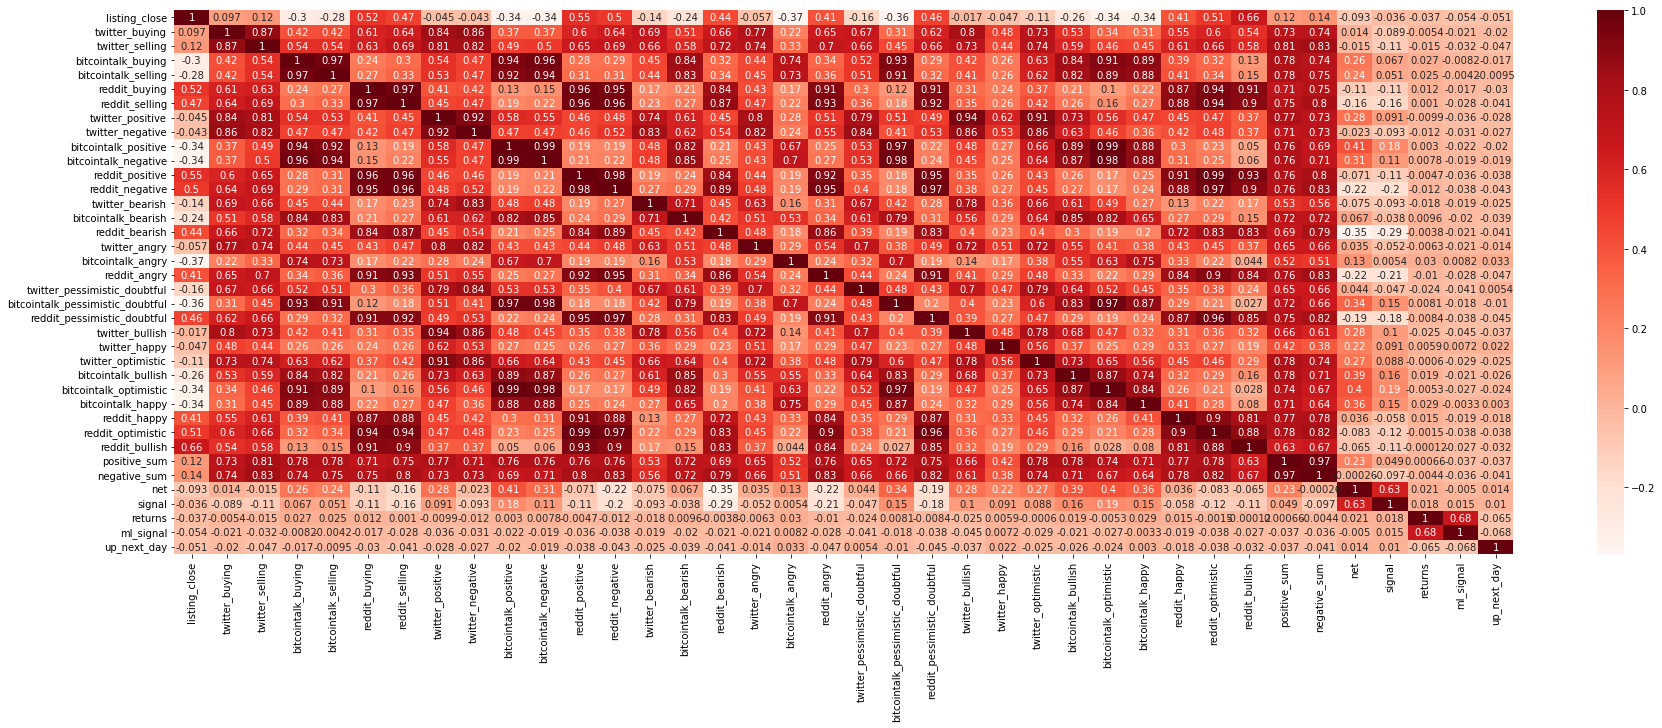

In [45]:
dfCorr = df_clean.corr()
plt.figure(figsize=(30,10))
sn.heatmap(dfCorr, annot=True, cmap="Reds")
plt.show()

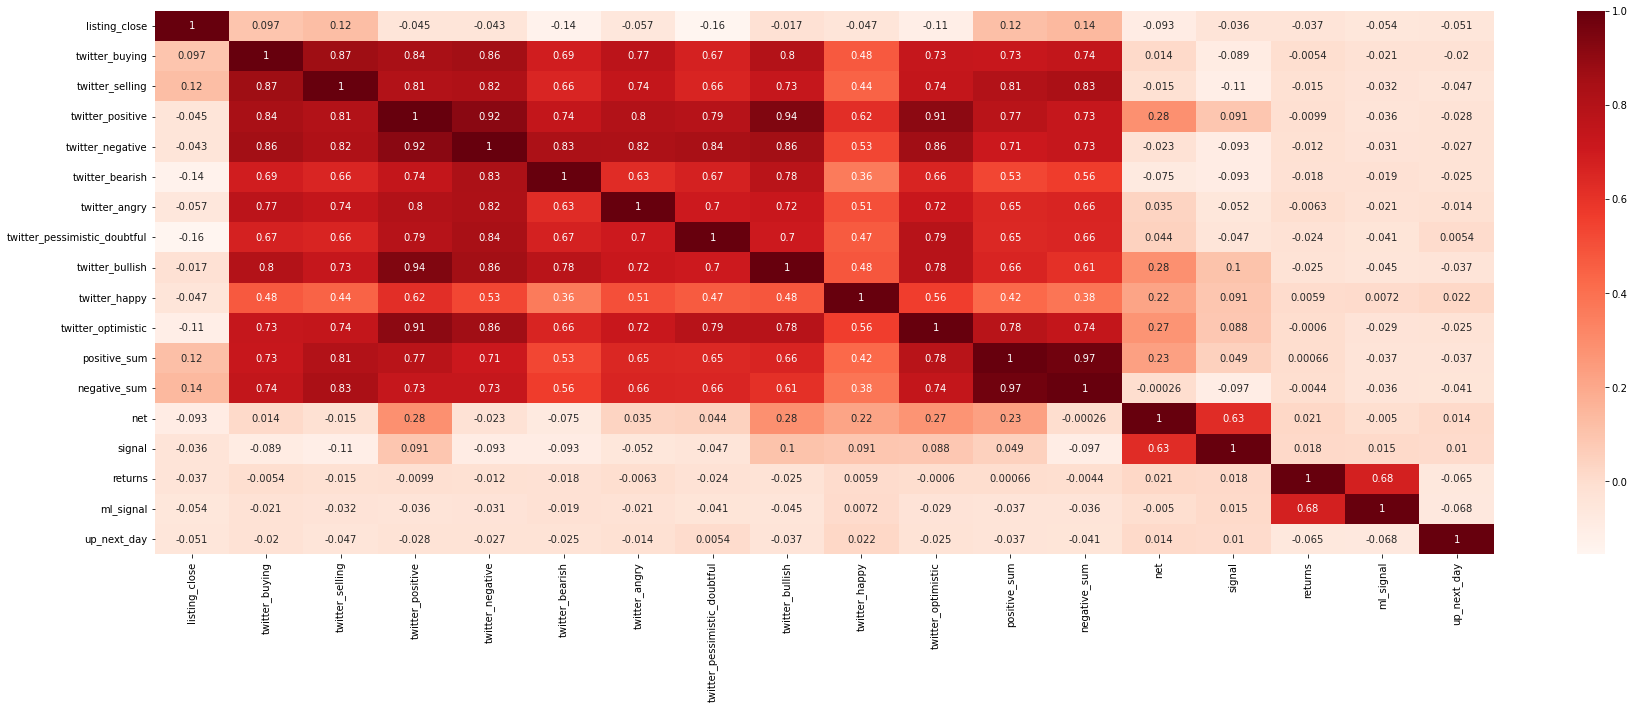

In [46]:
#Twitter Correlation
dfCorr = twitter_df.corr()
plt.figure(figsize=(30,10))
sn.heatmap(dfCorr, annot=True, cmap="Reds")
plt.show()

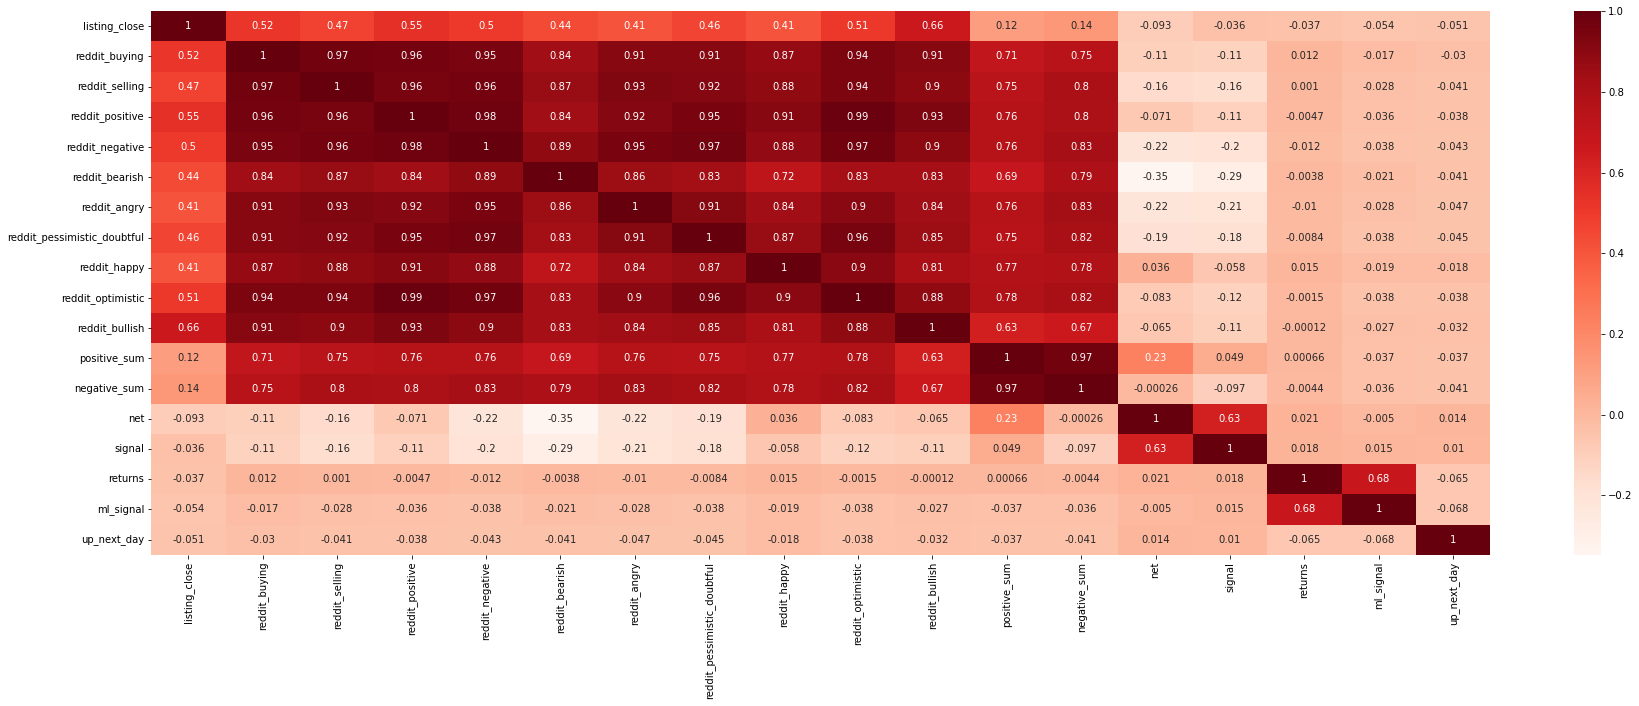

In [47]:
dfCorr = reddit_df.corr()
plt.figure(figsize=(30,10))
sn.heatmap(dfCorr, annot=True, cmap="Reds")
plt.show()

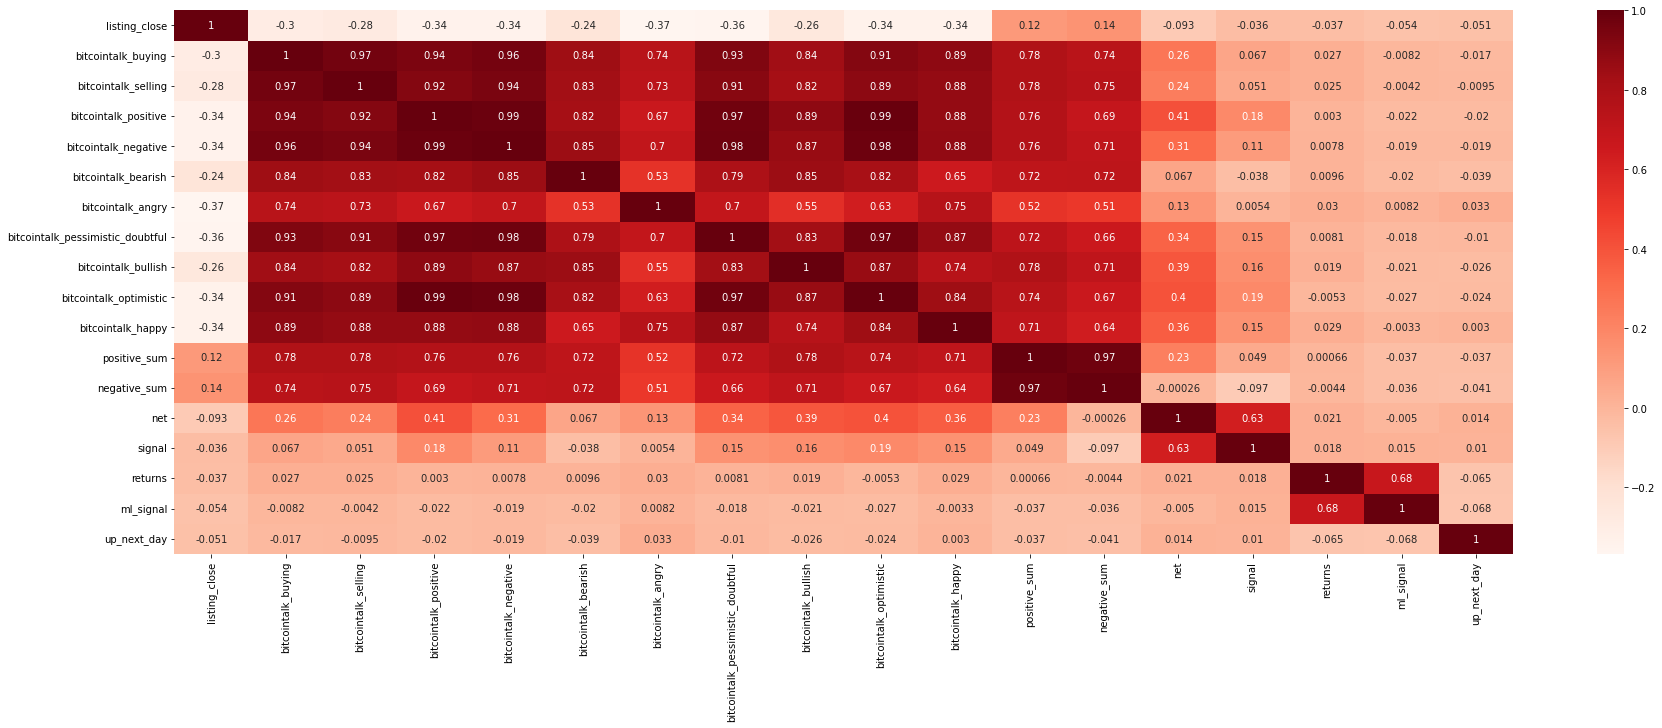

In [48]:
#BitcoinTalk Correlation
dfCorr = bitcoin_talk_df.corr()
plt.figure(figsize=(30,10))
sn.heatmap(dfCorr, annot=True, cmap="Reds")
plt.show()

In [49]:
#Random Forest Model
X = df_clean.iloc[:, 1:33]
y = df_clean['ml_signal']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

scaler = StandardScaler()

X_scaler = scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

rf_model = RandomForestClassifier(n_estimators=100, random_state=1)

rf_model = rf_model.fit(X_train_scaled, y_train)

predictions = rf_model.predict(X_test_scaled)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

        -1.0       0.53      0.35      0.42       248
         1.0       0.52      0.69      0.59       251

    accuracy                           0.52       499
   macro avg       0.52      0.52      0.51       499
weighted avg       0.52      0.52      0.51       499



In [50]:
importances = rf_model.feature_importances_
important_features = zip(X.columns,rf_model.feature_importances_)

important_features

In [51]:
#Create feature importance dataframe
importances_df = pd.DataFrame(important_features)
importances_df = importances_df.rename(columns={0: 'Feature', 1: 'Importance'})
importances_df = importances_df.set_index('Feature')
importances_df = importances_df.sort_values(by='Importance',ascending=False)

<AxesSubplot:title={'center':'Feature Importance'}, ylabel='Feature'>

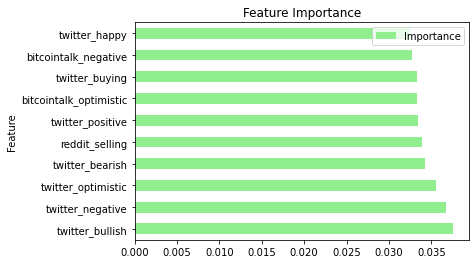

In [52]:
importances_df[0:10].plot(
    kind='barh', 
    color='lightgreen', 
    title= 'Feature Importance', 
    legend=True)

In [53]:
importances_df.head(10)

Importance
Feature                           
twitter_bullish           0.037609
twitter_negative          0.036788
twitter_optimistic        0.035504
twitter_bearish           0.034290
reddit_selling            0.033898
twitter_positive          0.033397
bitcointalk_optimistic    0.033264
twitter_buying            0.033254
bitcointalk_negative      0.032714
twitter_happy             0.032438

In [54]:
#There was a great volatility in the Bitcoin prices during period 07/01/2017 to 07/30/2018.
# The following code Slices the Twitter Datafrace and uses the sliced Dataframe to Train and test to see if the prediction accuracy improves

slice1_begin = pd.to_datetime("2017-07-01")
slice1_end = slice1_begin + DateOffset(months = 12)
slice1_end

twitter_slice1_df = twitter_df[slice1_begin:slice1_end]
twitter_slice1_df

#Twitter Sentiment
X = twitter_slice1_df.iloc[:, 1:12]
y = twitter_slice1_df['ml_signal']

from pandas.tseries.offsets import DateOffset

training_begin = X.index.min()
training_end = training_begin + DateOffset(months = 10)

X_train = X[training_begin:training_end]
X_test = X[training_end+DateOffset(days = 1):]
y_train = y[training_begin:training_end]
y_test = y[training_end+DateOffset(days = 1):]

X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape

scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

svm.fit(X_train_scaled, y_train)

y_pred = svm.predict(X_test_scaled)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        -1.0       0.47      0.22      0.30        41
         1.0       0.56      0.80      0.66        51

    accuracy                           0.54        92
   macro avg       0.52      0.51      0.48        92
weighted avg       0.52      0.54      0.50        92



In [55]:
#There was a great volatility in the Bitcoin prices during period 10/01/2020 to present.
# The following code Slices the Twitter Datafrace and uses the sliced Dataframe to Train and test to see if the prediction accuracy improve
slice2_begin = pd.to_datetime("2020-10-01")
slice2_end = slice2_begin + DateOffset(months = 18)
slice2_end
twitter_slice2_df = twitter_df[slice1_begin:slice1_end]
twitter_slice2_df

#Twitter Sentiment
X = twitter_slice2_df.iloc[:, 1:12]
y = twitter_slice2_df['ml_signal']

from pandas.tseries.offsets import DateOffset

training_begin = X.index.min()
training_end = training_begin + DateOffset(months = 10)

X_train = X[training_begin:training_end]
X_test = X[training_end+DateOffset(days = 1):]
y_train = y[training_begin:training_end]
y_test = y[training_end+DateOffset(days = 1):]

X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape

scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

svm.fit(X_train_scaled, y_train)

y_pred = svm.predict(X_test_scaled)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        -1.0       0.43      0.29      0.35        45
         1.0       0.48      0.64      0.55        47

    accuracy                           0.47        92
   macro avg       0.46      0.46      0.45        92
weighted avg       0.46      0.47      0.45        92



In [56]:
#The results based on slicing the dataframe for period of volatility did not yield good results
# This attempts to use entire historical data for training and then tests for the volatile period to see if the results improve
# This Cell is using the testing data for the current volatile period which started roughl around 10/01/2020

X = twitter_df.iloc[:, 1:12]
y = df_clean['ml_signal']

from pandas.tseries.offsets import DateOffset

training_begin = X.index.min()
training_end = training_begin + DateOffset(months = 54)

X_train = X[training_begin:training_end]
X_test = X[training_end+DateOffset(days = 1):]
y_train = y[training_begin:training_end]
y_test = y[training_end+DateOffset(days = 1):]

#X_train, X_test, y_train, y_test = train_test_split(X, y)
#X_train.shape

scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

svm.fit(X_train_scaled, y_train)

y_pred = svm.predict(X_test_scaled)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00       174
         1.0       0.51      1.00      0.67       178

    accuracy                           0.51       352
   macro avg       0.25      0.50      0.34       352
weighted avg       0.26      0.51      0.34       352



C:\Users\office2\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\office2\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\office2\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
#The results based on slicing the dataframe for period of volatility did not yield good results
# This attempts to use entire historical data for training and then tests for the volatile period to see if the results improve
# This Cell is using the testing data for the 2017-2018 period

X = twitter_df.iloc[:, 1:12]
y = df_clean['ml_signal']

from pandas.tseries.offsets import DateOffset

training_begin = X.index.min()
training_end = training_begin + DateOffset(months = 9)
test_end=pd.to_datetime("2018-08-30")

X_train = X[training_begin:training_end]
X_test = X[training_end+DateOffset(days = 1):test_end]
y_train = y[training_begin:training_end]
y_test = y[training_end+DateOffset(days = 1):test_end]

#X_train, X_test, y_train, y_test = train_test_split(X, y)
#X_train.shape

scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

svm.fit(X_train_scaled, y_train)

y_pred = svm.predict(X_test_scaled)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00       189
         1.0       0.52      1.00      0.68       205

    accuracy                           0.52       394
   macro avg       0.26      0.50      0.34       394
weighted avg       0.27      0.52      0.36       394



C:\Users\office2\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\office2\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\office2\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
